# Importing Required Libraries

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visuals as vs
import numpy as np

#  Loading Data 

In [261]:
DataSet = pd.read_csv('house-votes-84.csv')
US_Parties = DataSet['Class Name']
features = DataSet.drop('Class Name', axis = 1)
column , row = features.shape
DataSet.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [262]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class Name                                435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

In [263]:
for i in range(row):
    for j in range(column):
        if(features.iloc[:,[i][0]][j]=='n'):
            features.iloc[:,[i][0]][j]=0
        elif(features.iloc[:,[i][0]][j]=='y'):
            features.iloc[:,[i][0]][j]=1
        else:
            features.iloc[:,[i][0]][j]=None

,Total,Percent
export-administration-act-south-africa,104,0.239080
water-project-cost-sharing,48,0.110345
education-spending,31,0.071264
duty-free-exports,28,0.064368
superfund-right-to-sue,25,0.057471


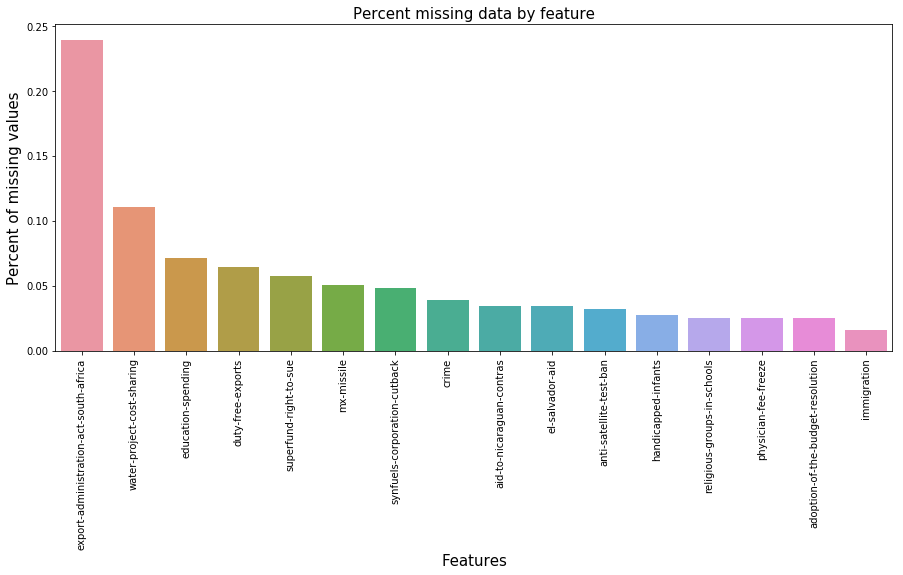

In [264]:
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

# Taking care of missing data

In [265]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(features)
features = imputer.transform(features)

In [266]:
for k in range(row):
    for l in range(column):
        if(features[l][k]>=0.5):
            features[l][k]=1
        else:
            features[l][k]=0

In [267]:
df_features = pd.DataFrame(features)
df_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [268]:
US_Parties.head()

0    republican
1    republican
2      democrat
3      democrat
4      democrat
Name: Class Name, dtype: object

In [269]:
Parties = US_Parties
Parties.head()

0    republican
1    republican
2      democrat
3      democrat
4      democrat
Name: Class Name, dtype: object

In [270]:
for i in range(column):
    if(Parties[i]=='republican'):
        Parties[i] = 0
    else:
        Parties[i] = 1
Parties.head()

0    0
1    0
2    1
3    1
4    1
Name: Class Name, dtype: object

In [271]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split


# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df_features, Parties, test_size=0.20, shuffle=True, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [272]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [273]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid  = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    #grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [274]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 2 for the optimal model.


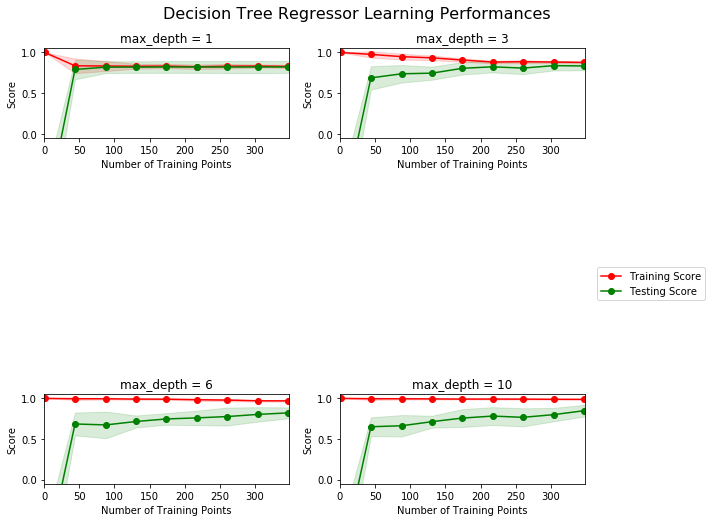

In [275]:
# Produce learning curves for varying training set sizes and maximum depths

vs.ModelLearning(features, Parties)

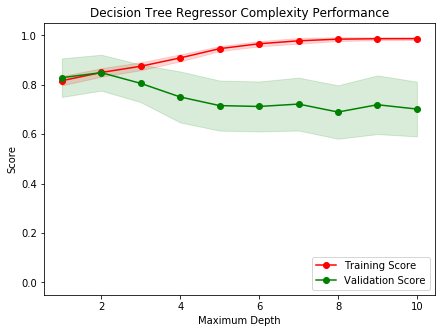

In [276]:
vs.ModelComplexity(X_train, y_train)

In [307]:
from sklearn.metrics import accuracy_score
pred = Y_predict
accuracy_score(test, Y_predict.round(),normalize=False)

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [312]:
Y_predict.astype(int)

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [311]:
y_test.values.astype(int)

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])